# Решение антагонистической матричной игры

In [90]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
%matplotlib inline
def nash_equilibrium(main_mas):
    n=len(main_mas)
    m=len(main_mas[1])
    t_main_mas=np.array(main_mas).T
    #maxmin
    min1=np.empty(n)
    for i in range (n):
        min1[i] = np.min(main_mas[i])
    max1=np.max(min1)
    max1_xy= np.where(main_mas==max1)
    #minmax
    max2=np.empty(m)
    for i in range (m):
        max2[i] = np.max(t_main_mas[i])
    min2=np.min(max2)
    min2_xy = np.where(main_mas==min2)
    if (max1==min2):  # Равновесие Нэша в чистых стратегиях
        v = max1
        for i in range (len(max1_xy[0])):
            for j in range (len(min2_xy[0])):
                if (max1_xy[0][i]==min2_xy[0][j]) and (max1_xy[1][i]==min2_xy[1][j]):
                    new_xy =np.array([max1_xy[0][i],max1_xy[1][i]])
        p = np.empty(n)
        q = np.empty(m)
        for i in range (n):
            if (i==new_xy[0]):
                p[i]=1
            else:
                p[i]=0
        for i in range (m):
            if (i==new_xy[1]):
                q[i]=1
            else:
                q[i]=0
    else: # смешанные стратегии
        matr1 = -t_main_mas
        c = [1]*n
        b = [-1]*m
        result = linprog(c, matr1, b, bounds= [(0, None)] * n)
        v = 1/np.sum(result.x)
        p = v * result.x
        matr2 = np.array(main_mas)
        c = [-1]*m
        b = [1]*n
        result2 = linprog(c, matr2, b, bounds=[(0, None)] * m)
        q = v * result2.x
    print ('решение игры:', v)
    print ('оптимальная стратегия 1 игрока', p)
    print ('оптимальная стратегия 2 игрока', q)
    return v,p,q
def draw(p,q):
    plt.xlim([0, len(p)+1])
    plt.ylim([0, np.max(p)+1])
    for i in range(len(p)):
        plt.plot([i+1, i+1], [0, p[i]])
        plt.scatter(i+1, p[i])
        plt.scatter(i+1, 0)
    plt.show()

    plt.xlim([0, len(q)+1])
    plt.ylim([0, np.max(q)+1])    
    for i in range(len(q)):
        plt.plot([i+1, i+1], [0, q[i]])
        plt.scatter(i+1, q[i])
        plt.scatter(i+1, 0)
    plt.show()

# 1. Cпектр оптимальной стратегии состоит из одной точки

решение игры: 1.0
оптимальная стратегия 1 игрока [ 0.  0.  0.  1.]
оптимальная стратегия 2 игрока [ 0.  0.  0.  1.  0.  0.]


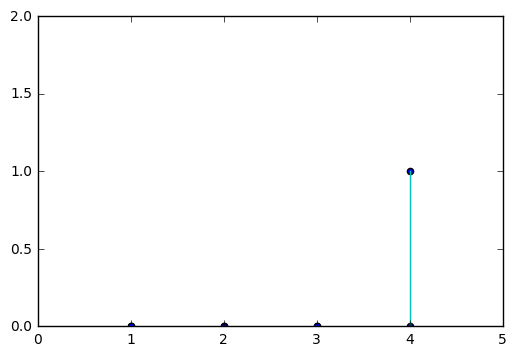

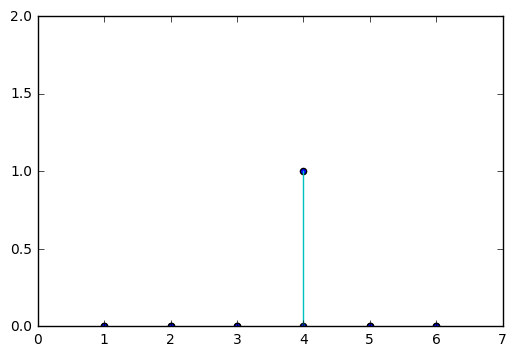

In [91]:
main_mas = np.array([[1, 2, 3, -4, 5, 6],
                     [5, -1, 2, -3, -2, 3],
                     [2, 1, 3, 1, 2, 1],
                     [-1, 2, 1, 1, 2, 5]])
v,p,q = nash_equilibrium(main_mas)
draw(p,q)

# 2. Cпектр оптимальной стратегии неполон

решение игры: 4.625
оптимальная стратегия 1 игрока [ 0.3125  0.25    0.      0.4375]
оптимальная стратегия 2 игрока [ 0.125   0.1875  0.6875]


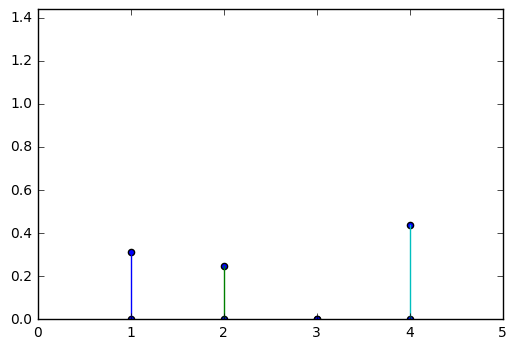

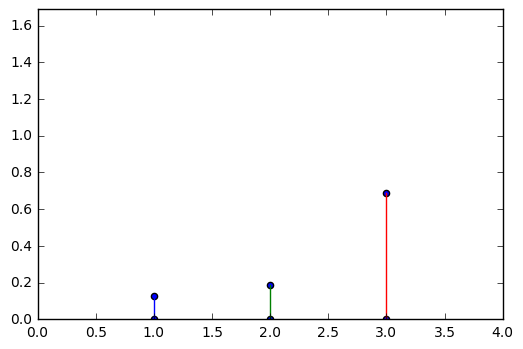

In [92]:
main_mas = np.array([[4, 0, 6],
                     [3, 8, 4],
                     [1, 2, 6],
                     [6, 6, 4]])
v,p,q = nash_equilibrium(main_mas)
draw(p,q)

# 3. Cпектр оптимальной стратегии полон

решение игры: 2.5
оптимальная стратегия 1 игрока [ 0.25  0.25  0.5 ]
оптимальная стратегия 2 игрока [ 0.25  0.5   0.25]


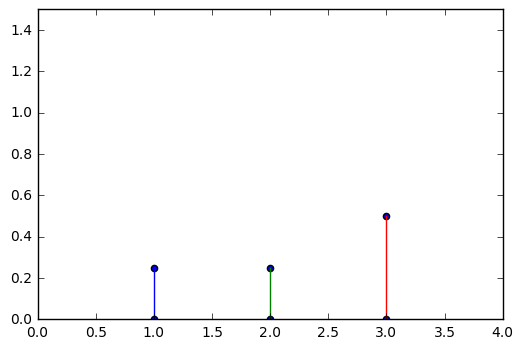

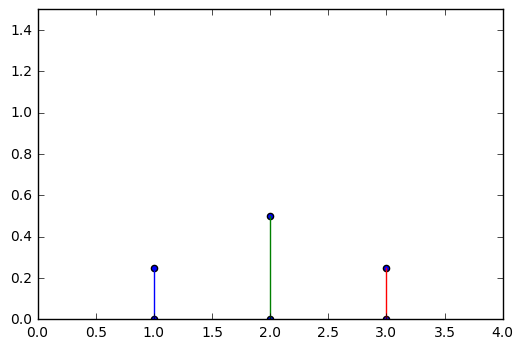

In [93]:
main_mas = np.array([[3, 1, 5],
                     [1, 3, 3],
                     [3, 3, 1]])
v,p,q = nash_equilibrium(main_mas)
draw(p,q)